# hw3

For this homework, you are a data scientist working for Pronto (before the end of their contract with the City of Seattle). Your job is to assist in determining how to do end-of-day adjustments in the number of bikes at stations so that all stations will have enough bikes for the next day of operation (as estimated by the weekday average for the station for the year). Your assistance will help in constructing a plan for each day of the week that specifies how many bikes should be moved from each station and how many bikes must be delievered to each station. Use the 2015 trip data.

Your assignment is to construct plots of the differences between 'from' and 'to' counts for each station by day of the week. Do this as a set of 7 subplots. You should use at least one function to construct your plots.

### Grading

2-pts: create a dataframe with station counts averages by day-of-week

1-pt: structure the 7 day-of-week plots as subplots

1-pt: label the plots by day-of-week

1-pt: label the x-axis for plots in the last row and label the y-axis for plots in the left-most column


## Solution


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("2015_trip_data.csv")
data.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1970.0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1988.0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1977.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1971.0


### create a dataframe with station counts averages by day-of-week

In [3]:
times = pd.DatetimeIndex(data['starttime'])
data['day_of_week'] = times.dayofweek

In [4]:
# calculate how many weeks during the time
df = pd.DataFrame({'start' : pd.to_datetime(data['starttime'][0]),
                   'end' : pd.to_datetime(data['starttime'][len(data) - 1])}, index = [0])
(df['end']-df['start']).apply(lambda x: x/np.timedelta64(1,'W'))

0    52.072817
dtype: float64

**From_station average count**

In [5]:
# create from_station average counts datafram by day of week
week_name = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ls_from = []
for i in range(0,7):
    subset = data[data.day_of_week == i]
    station_counts = pd.value_counts(subset['from_station_id'])
    station_mean = pd.DataFrame({week_name[i] : station_counts/52})
    station_mean = round(station_mean,1)
    ls_from.append(station_mean)
df_from = pd.concat(ls_from, axis=1)  
df_from.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
BT-01,15.5,13.9,13.1,15.4,17.7,22.1,15.5
BT-03,11.1,11.4,11.9,11.7,12.6,11.5,10.5
BT-04,7.4,6.8,6.6,7.1,6.6,4.3,4.0
BT-05,9.6,9.4,8.9,9.5,9.9,9.7,7.7
CBD-03,9.0,8.7,8.5,9.2,8.9,5.9,6.9


**To_station average count**

In [6]:
# create to_station average counts datafram by day of week
ls_to = []
for i in range(0,7):
    subset = data[data.day_of_week == i]
    station_counts = pd.value_counts(subset['to_station_id'])
    station_mean = pd.DataFrame({week_name[i] : station_counts/52})
    station_mean = round(station_mean,1)
    ls_to.append(station_mean)
df_to = pd.concat(ls_to, axis=1)  
df_to.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
BT-01,15.2,12.9,13.4,15.2,16.3,22.1,16.4
BT-03,10.2,9.9,10.1,8.6,9.0,8.3,9.0
BT-04,6.3,5.6,5.8,5.5,5.4,3.9,3.2
BT-05,9.8,9.6,9.4,10.6,9.7,9.7,7.8
CBD-03,11.9,11.5,11.9,11.7,12.3,8.6,8.3


### create plots

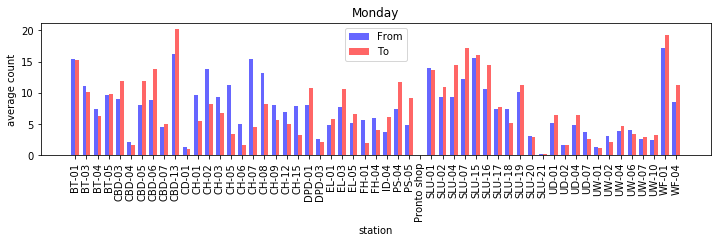

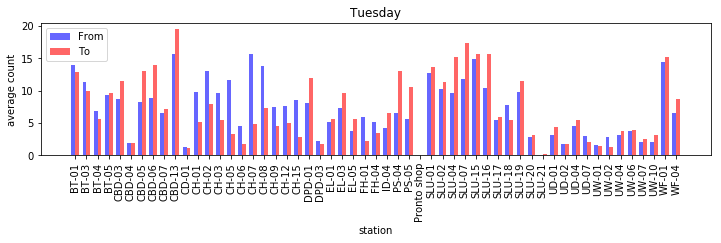

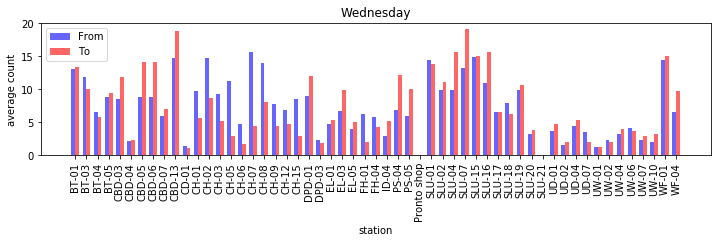

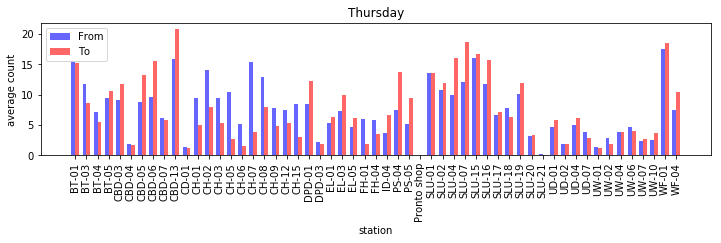

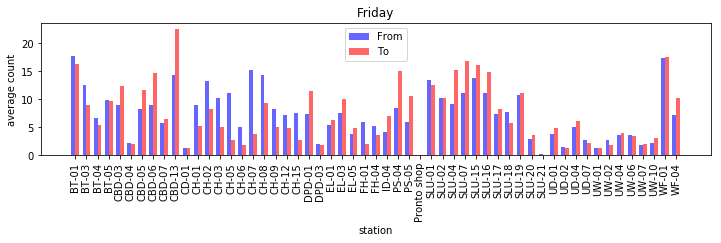

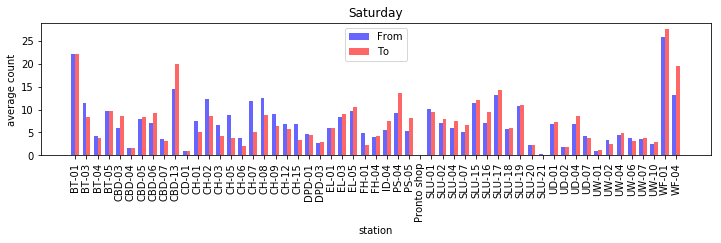

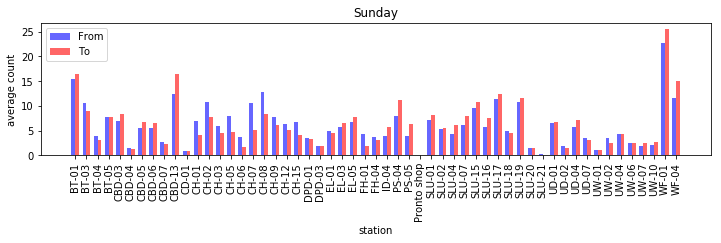

In [7]:
def plot_diff(df_from, df_to, columns):
    
    n_columns = len(columns)
    n_groups = len(df_from.index)
    index = np.arange(n_groups)  # The "raw" x-axis of the bar plot 
    bar_width = 0.35  # Width of the bars
    opacity = 0.6  # How transparent the bars are
    
    i = 0
    for column in columns:
        i += 1
        fig = plt.figure(figsize=(12, 20))
        plt.subplot(n_columns, 1, i)
        # barplot for df_from
        rects1 = plt.bar(index, df_from[column], bar_width,
                 alpha=opacity,
                 color='b',
                 label='From')
        # barplot for df_to
        rects2 = plt.bar(index + bar_width, df_to[column], bar_width,
                 alpha=opacity,
                 color='r',
                 label='To')
        
        plt.xticks(index + bar_width / 2, df_from.index)
        _, labels = plt.xticks()  # Get the new labels of the plot
        plt.setp(labels, rotation=90)  # Rotate labels to make them readable
        plt.xlabel('station')
        plt.ylabel('average count')
        plt.title(column)
        plt.legend()
        plt.show()
# call function    
plot_diff(df_from,df_to,week_name)